In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df1=pd.read_csv('d:\\iris.csv')
df1.head()


,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
scaler.fit(df1.drop('variety',axis=1))

StandardScaler()

In [35]:
scaled_feat=scaler.transform(df1.drop('variety',axis=1))

In [36]:
scaled_feat

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
finaldata=pd.DataFrame(scaled_feat,columns=df1.columns[:-1])

In [38]:
finaldata

,sepallength,sepalwidth,petallength,petalwidth
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


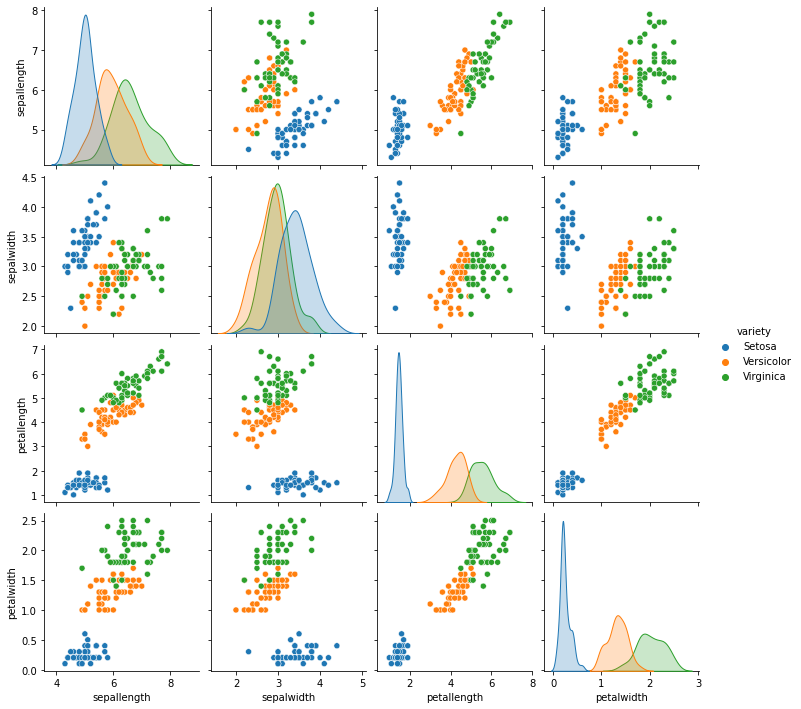

In [40]:
sns.pairplot(df1,hue='variety')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feat,df1['variety'],test_size=0.30)

In [58]:
#Knn model
from sklearn.neighbors import KNeighborsClassifier


In [96]:
knn= KNeighborsClassifier(n_neighbors=10) 

In [97]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [98]:
prediction=knn.predict(x_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [100]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]


In [81]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[19  0  0]
 [ 0 11  1]
 [ 0  4 10]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.73      0.92      0.81        12
   Virginica       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.90      0.89      0.89        45



In [101]:
acc=[]
for i in range(1,40):
        knn=KNeighborsClassifier(i)
        score=cross_val_score(knn,scaled_feat,df1['variety'],cv=10)
        acc.append(score.mean())


In [102]:
print(acc)

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9666666666666666, 0.9533333333333334, 0.9666666666666668, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.96, 0.96, 0.9666666666666666, 0.9466666666666667, 0.9533333333333334, 0.9400000000000001, 0.9466666666666667, 0.9400000000000001, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9400000000000001, 0.9466666666666667, 0.9400000000000001, 0.9333333333333333, 0.9133333333333333, 0.9133333333333333, 0.9, 0.9133333333333333, 0.9, 0.9]


In [103]:
error_rate=[]
for i in range(1,40):
        knn=KNeighborsClassifier(i)
        score=cross_val_score(knn,scaled_feat,df1['variety'],cv=10)
        error_rate.append(1-score.mean())



Text(0, 0.5, 'Error Rate')

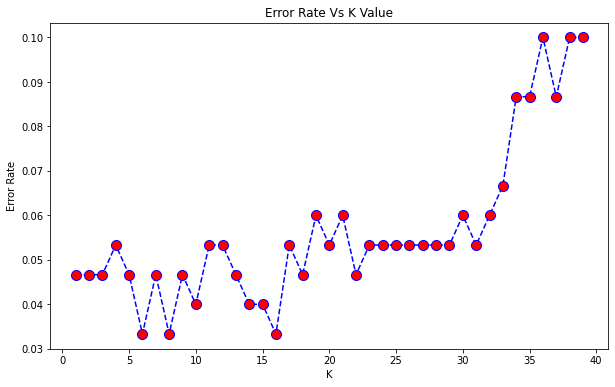

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')